In [1]:
import onnx
import onnxruntime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
onnx_model_path = 'model2_singleoutput.onnx'
onnx_model = onnx.load(onnx_model_path)
onnx_runtime = onnxruntime.InferenceSession(onnx_model_path)

In [3]:
data = pd.read_csv('./data/merged_data_wavelet.csv')

In [4]:
len(data)

120

In [5]:
sample = data.iloc[0]

In [6]:
np.reshape(sample.iloc[0:4095].values, (1, 1, 4095)).shape

(1, 1, 4095)

In [ ]:
onnx_input = {onnx_runtime.get_inputs()[0].name: inputs.numpy()}
onnx_output = onnx_runtime.run(None, onnx_input)
onnx_output = torch.tensor(onnx_output[0])

In [10]:
for idx in range(0, len(data)):
    sample = data.iloc[idx]
    inputs = np.reshape(sample.iloc[0:4095].values, (1, 1, 4095))
    onnx_input = {onnx_runtime.get_inputs()[0].name: inputs.astype(np.float32)}
    onnx_output = onnx_runtime.run(None, onnx_input)
    actual_op = sample['y0']
    print(f'actual output {actual_op} \t predicted output{onnx_output[0][0][0]*4095}')

actual output 1066.0 	 predicted output1060.2864879369736
actual output 1065.0 	 predicted output1056.966009736061
actual output 1066.0 	 predicted output1055.2368177473545
actual output 1041.0 	 predicted output1050.8029639720917
actual output 1048.0 	 predicted output1048.6022074520588
actual output 1048.0 	 predicted output1044.2207090556622
actual output 1057.0 	 predicted output1046.2487782537937
actual output 1048.0 	 predicted output1043.116364479065
actual output 1057.0 	 predicted output1041.1225886642933
actual output 1048.0 	 predicted output1038.487367928028
actual output 1030.0 	 predicted output1030.5707220733166
actual output 1021.0 	 predicted output1028.822979927063
actual output 1030.0 	 predicted output1025.6084328889847
actual output 1030.0 	 predicted output1023.7202221155167
actual output 1023.0 	 predicted output1021.8422017246485
actual output 1038.0 	 predicted output1026.218879520893
actual output 1031.0 	 predicted output1026.2742859125137
actual output 1038.

In [3]:
# Read data from .csv file
data = np.genfromtxt('./data/data_852.356_without_filter.csv', delimiter=',')

In [4]:
# We will seperate the data of each ramp slope

# get out the indices of minimum and maximum position in ramp value
min_index = np.where(data[:,0] == np.min(data[:,0]))
max_index = np.where(data[:,0] == np.max(data[:,0]))

print(f'min_index length: {np.shape(min_index)[1]}\nmax_index length: {np.shape(max_index)[1]} \n')
print(f'Min_indices: {min_index},\nMax_indices:{max_index}')

min_index length: 122
max_index length: 121 

Min_indices: (array([  5019,  13209,  21399,  29589,  37779,  45969,  54159,  62349,
        70539,  78729,  86919,  95109, 103299, 111489, 119679, 127869,
       136059, 144249, 152439, 160629, 168819, 177009, 185199, 193389,
       201579, 209769, 217959, 226149, 234339, 242529, 250719, 258909,
       267099, 275289, 283479, 291669, 299859, 308049, 316239, 324429,
       332619, 340809, 348999, 357189, 365379, 373569, 381759, 389949,
       398139, 406329, 414519, 422709, 430899, 439089, 447279, 455469,
       463659, 471849, 480039, 488229, 496419, 504609, 512799, 520989,
       529179, 537369, 545559, 553749, 561939, 570129, 578319, 586509,
       594699, 602889, 611079, 619269, 627459, 635649, 643839, 652029,
       660219, 668409, 676599, 684789, 692979, 701169, 709359, 717549,
       725739, 733929, 742119, 750309, 758499, 766689, 774879, 783069,
       791259, 799449, 807639, 815829, 824019, 832209, 840399, 848589,
       856779, 86

In [5]:
pd1 = data[:, 1]
pd2 = data[:, 2]

pd1_0 = pd1[min_index[0][0]:max_index[0][0]]
pd2_0 = pd2[min_index[0][0]:max_index[0][0]]
pd_diff = pd1_0 - pd2_0

In [6]:
pd_diff

array([-11., -10., -14., ..., -60., -49., -47.])

<IPython.core.display.Javascript object>


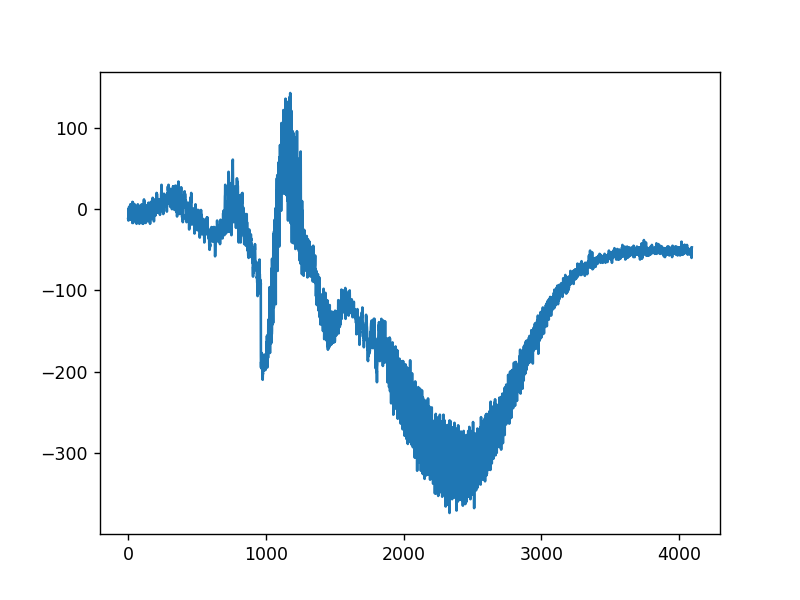

In [7]:
%matplotlib notebook
plt.plot(pd_diff)

In [8]:
import lockcoordinates

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
output = lockcoordinates.LockCoordinates(onnx_model_path)

In [10]:
output.getLockingPoint(pd1_0, pd2_0)

(1059, -68)

In [11]:
0.25882423*4095

1059.8852218499999